# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | susuman
Processing Record 2 of Set 1 | el calafate
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | port lincoln
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | port saint john's
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | papatowai
Processing Record 11 of Set 1 | choibalsan
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | mundri
Processing Record 14 of Set 1 | wenchang
Processing Record 15 of Set 1 | tanjung selor
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | tekkali
Processing Record 18 of Set 1 | pailon
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | ngaoundere
Processing Record 21 of Set

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,susuman,62.7833,148.1667,273.96,55,51,7.84,RU,1727134932
1,el calafate,-50.3408,-72.2768,274.74,79,66,6.68,AR,1727134685
2,blackmans bay,-43.0167,147.3167,283.00,62,82,1.34,AU,1727134935
3,port lincoln,-34.7333,135.8667,287.98,73,100,2.52,AU,1727134936
4,saint-pierre,-21.3393,55.4781,292.97,73,0,1.54,RE,1727134937


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,273.96,55,51,7.84,RU,1727134932
1,el calafate,-50.3408,-72.2768,274.74,79,66,6.68,AR,1727134685
2,blackmans bay,-43.0167,147.3167,283.00,62,82,1.34,AU,1727134935
3,port lincoln,-34.7333,135.8667,287.98,73,100,2.52,AU,1727134936
4,saint-pierre,-21.3393,55.4781,292.97,73,0,1.54,RE,1727134937


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

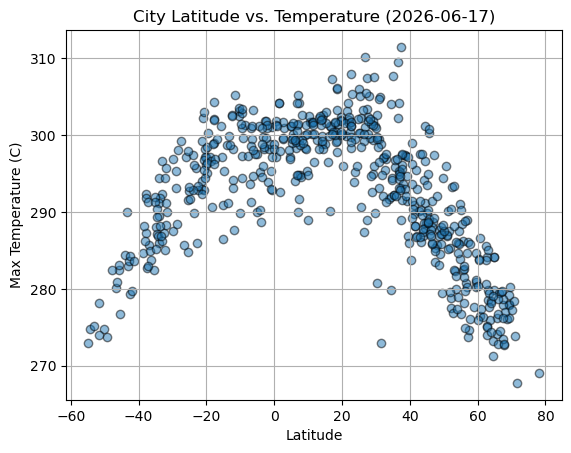

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.5, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2026-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

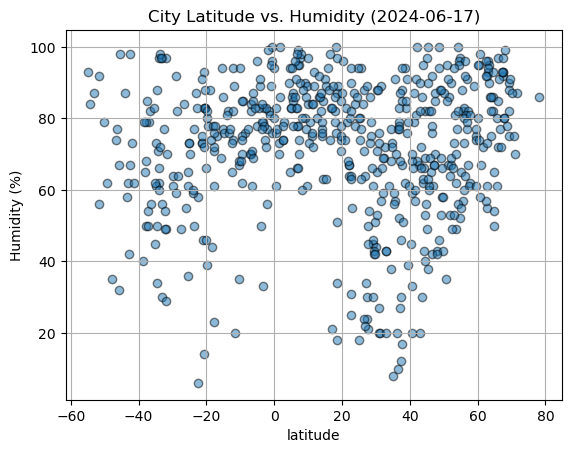

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.5, edgecolors="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

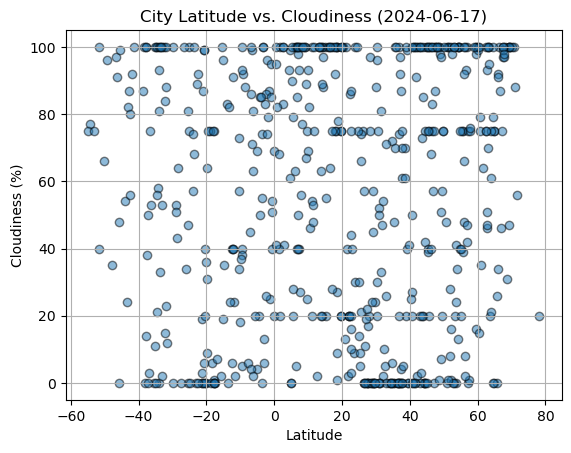

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.5, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

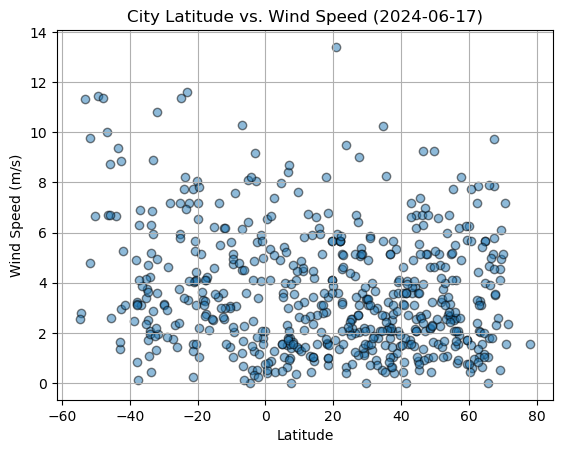

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.5, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


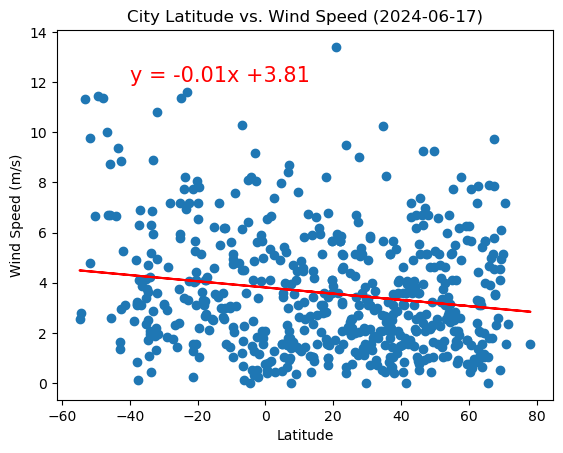

R-value: -0.1691344836264283


In [20]:
# Define a function to create Linear Regression plots
def linreg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    f, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x, regress_values, 'red')
    
    return ax, line_eq, rvalue

ax, line_eq, rvalue =linreg_plot(city_data_df['Lat'], city_data_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(-40,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f"R-value: {rvalue}")

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,susuman,62.7833,148.1667,273.96,55,51,7.84,RU,1727134932
6,college,64.8569,-147.8028,284.14,50,75,5.66,US,1727134942
8,choibalsan,48.0667,114.5000,285.73,43,100,0.98,MN,1727134944
9,thompson,55.7435,-97.8558,286.24,82,75,2.06,CA,1727134945
11,wenchang,30.9040,118.4887,293.15,76,52,2.15,CN,1727134947


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,el calafate,-50.3408,-72.2768,274.74,79,66,6.68,AR,1727134685
2,blackmans bay,-43.0167,147.3167,283.00,62,82,1.34,AU,1727134935
3,port lincoln,-34.7333,135.8667,287.98,73,100,2.52,AU,1727134936
4,saint-pierre,-21.3393,55.4781,292.97,73,0,1.54,RE,1727134937
5,port saint john's,-31.6229,29.5448,290.02,70,12,1.94,ZA,1727134938


###  Temperature vs. Latitude Linear Regression Plot

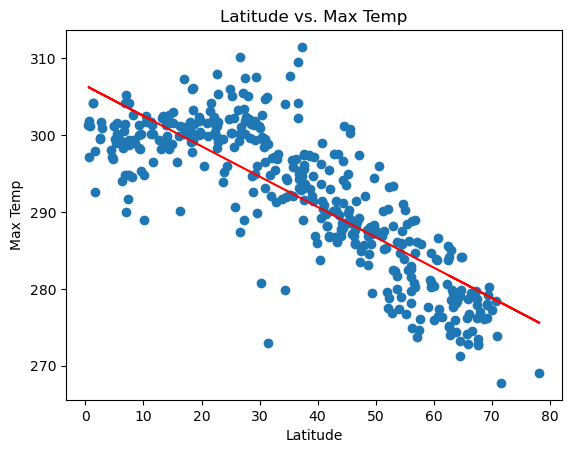

In [23]:
# Linear regression on Northern Hemisphere
ax, line_eq, rvalue = linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
ax.plot()
plt.annotate(line_eq, (10,-40), fontsize=13, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Max Temp")
plt.show()

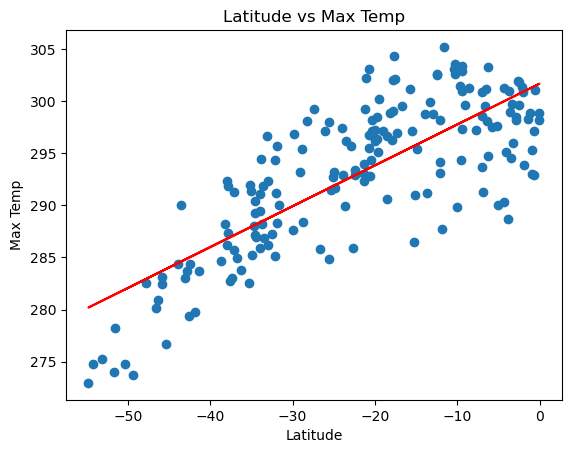

In [24]:
# Linear regression on Southern Hemisphere
ax, line_eq, rvalue = linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
ax.plot()
plt.annotate(line_eq, (-50,30), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
plt.show()

**Discussion about the linear relationship:** The tightness in the scatter plot discebies that the relationship between latitude and temperature is higher and stronger in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity, Norhtern Hemisphere')

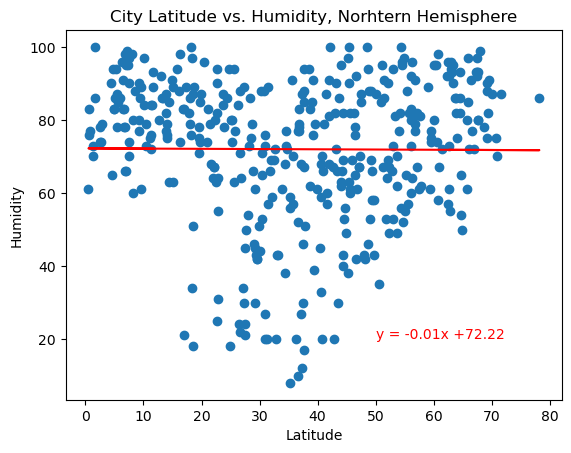

In [25]:
# Northern Hemisphere
ax, line_eq, rvalue = linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq, (50,20), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity, Norhtern Hemisphere")

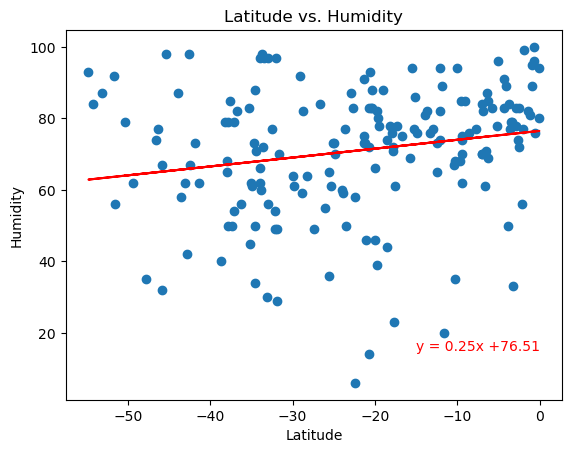

In [26]:
# Southern Hemisphere
ax, line_eq, rvalue = linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq, (-15,15), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere the relationship between latitude and humidity is stronger

### Cloudiness vs. Latitude Linear Regression Plot

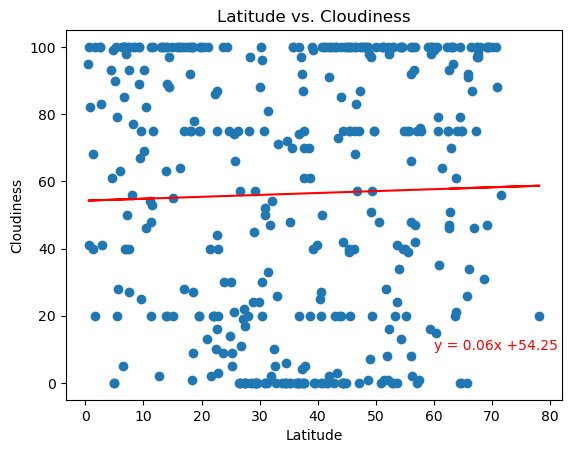

In [27]:
# Northern Hemisphere
ax, line_eq, rvalue = linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq, (60,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.show()

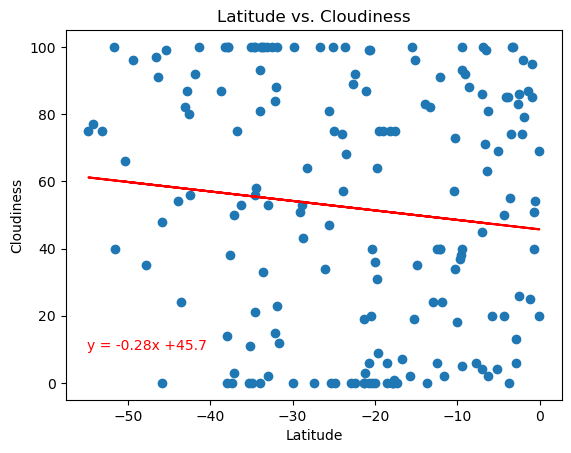

In [28]:
# Southern Hemisphere
ax, line_eq, rvalue = linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq, (-55,10), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.show()

**Discussion about the linear relationship:** the relationship between cloudiness and latitude is a little bit similar for both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

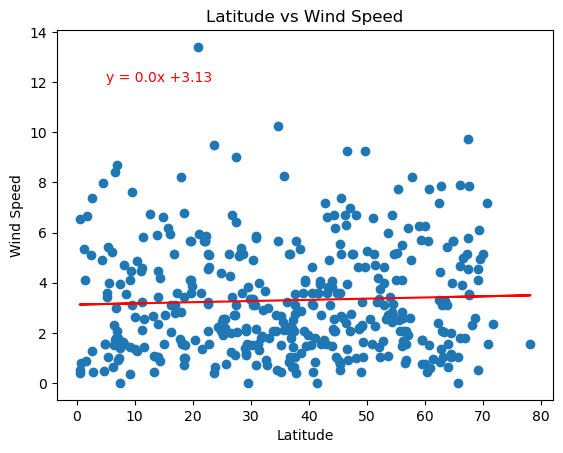

In [29]:
# Northern Hemisphere
ax, line_eq, rvalue = linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq, (5,12), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

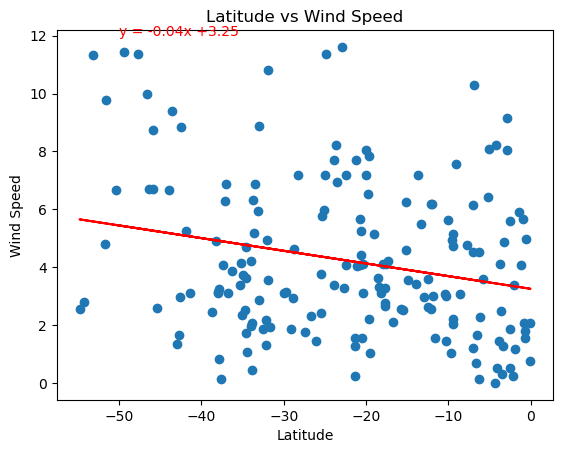

In [30]:
# Southern Hemisphere
ax, line_eq, rvalue = linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq, (-50,12), fontsize=10, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.show()

**Discussion about the linear relationship:** There is not a linear relationship between latitude and wind speed